In [71]:
# Script page for ASTRO 400B Project
# Currently no comments still testing and writing and thinking
# Tyler Baines
# Spring 2018

In [2]:
# Import Modules
import numpy as np
import astropy.units as u
import astropy.table as tbl
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

%matplotlib inline
# Import my Modules
from Readfile import Read
#from GalaxyMass import ComponentMass
from FindFiles import FileFinder
from CenterOfMass import CenterOfMass
from MassProfile import MassProfile

# Find files specific times correlating to Galaxy's apocenter and Remnant for bulge Components

In [3]:
"""Find files corresponding to specific times that relate to the apocenter's of each galaxy respectively"""
Times = np.array([0.0, 4.79, 6.07, 10.3])
MW_files = FileFinder("MW", Times) 
M31_files = FileFinder("M31", Times)

Bulge_index = 3

print ("%s\n%s" % (MW_files, M31_files))


['MW_000', 'MW_335', 'MW_425', 'MW_721']
['M31_000', 'M31_335', 'M31_425', 'M31_721']


In [4]:
"""Define array of the snap shots corresponding to galaxies"""
Snaps = np.array([0,335,425,721])    

# Function that Calculates Profiles for Mass and velocity and saves as a file
##### Files will be used to be called on to make plotting Faster

In [4]:
def Data_File(Galaxy, Snap, ptype, variable_type, r_grid_n = 50,):
    # This function takes in the input: String of Galaxy name i.e. MW, M31, or M33
    #                                   Snaphot number
    #                                   Particle type 1,2,3 indicating the component of the galaxy
    #                                   String of variable type that takes in M, V, D (Mass, Velocity, Density)
    #                                   The Rgrid index values set at 50 points
    #
    # This function will compute the mass/velocity profiles
    # And returns a save array to file with extention ".dat"
    # which contains x,y values of Mass/Velocity as a function of Raidus
    
    # Define a log spacing range since will be plotting in semilogy for Mass
    r_grid = np.geomspace(0.01,30, r_grid_n, endpoint=True)
    
    # Initialize the Mass Profile class for galaxy at some snap
    Mass_Profile = MassProfile(Galaxy, Snap)
    
    
    # First Check:
    # Check variable type you wish to make quantity profile for
    if variable_type == "M":
        
        # Compute the mass enclosed for the bulge hence Mass_Bulge_grid in this project. Would need to be changed to Mass_grid
        Mass_Bulge_grid = Mass_Profile.MassEnclosed(ptype, r_grid)
        
        # Concatenate r_grid and M_B_grid and reshape array to 2 by length of r_grid and take transpose of array to have 2 columns
        File = np.concatenate((r_grid, Mass_Bulge_grid), axis = 0).reshape(2,len(r_grid)).T
        
        # Indicate file name Galaxy_Snap#_MassProfile.dat i.e. galaxy with respective snap and profile calculated
        filename = str(Galaxy)+"_"+str(Snap)+"_MassProfile.dat"
        
        # Make header for file to tell reader what is contained in file
        header = "variables: R, Bulge Mass"
        
        # Save the array to file
        np.savetxt(filename, File, header= header, comments="#")
    
    
    # Second and Third Check: Follow same process for first check but with velocity or density profiles
    elif variable_type == "V":
        Velocity_Bulge_grid = Mass_Profile.CircularVelocity(ptype, r_grid)
        File = np.concatenate((r_grid, Velocity_Bulge_grid), axis = 0).reshape(2, len(r_grid)).T
        filename = str(Galaxy)+"_"+str(Snap)+"_Velocity_Profile.dat"
        header = "variables: R, Bulge Mass"
        np.savetxt(filename, File, header= header, comments="#")
    
    # Density profile assumes spherical symmetry
    elif variable_type == "D":
        Mass_Bulge_grid = Mass_Profile.MassEnclosed(ptype, r_grid)
        Density_Bulge_grid = 3*MW_Mass_Bulge/(4*np.pi*R_array**3)
        File = np.concatenate((r_grid, Density_Bulge_grid), axis = 0).reshape(2,len(r_grid)).T
        filename = str(Galaxy)+"_"+str(Snap)+"_DensityProfile.dat"
        header = "variables: R, Bulge Mass"
        np.savetxt(filename, File, header= header, comments="#")        
    
    
    

#Make Data Files for plotting purposes
for ii in range(len(Snaps)):
    print (Snaps[ii])
    Data_File("MW", Snaps[ii], Bulge_index, "M")
    Data_File("MW", Snaps[ii], Bulge_index, "V")
    Data_File("M31", Snaps[ii],Bulge_index, "M")
    Data_File("M31", Snaps[ii],Bulge_index, "V")

# Load define file names for each respective galaxy for M and V profiles to loop through and Products  2 x 2 plot Comparison
#### Neglect Remnant file not really relevant here

In [5]:
#lOAD AND PLOT DATA FILES
# File names for MW Mass
Data_files_Mass_MW = ["MW_0_MassProfile.dat", "MW_335_MassProfile.dat", "MW_425_MassProfile.dat", "MW_721_MassProfile.dat"]

# File names for MW Velocity
Data_files_Velocity_MW = ["MW_0_Velocity_Profile.dat", "MW_335_Velocity_Profile.dat", "MW_425_Velocity_Profile.dat", "MW_721_Velocity_Profile.dat"]

# File names for M31 Mass
Data_files_Mass_M31 = ["M31_0_MassProfile.dat", "M31_335_MassProfile.dat", "M31_425_MassProfile.dat", "M31_721_MassProfile.dat"]

# File names for M31 Velocity
Data_files_Velocity_M31 = ["M31_0_Velocity_Profile.dat", "M31_335_Velocity_Profile.dat", "M31_425_Velocity_Profile.dat", "M31_721_Velocity_Profile.dat"]

# linestyles for plotting
ls = ['-', '--', '-.', ':']

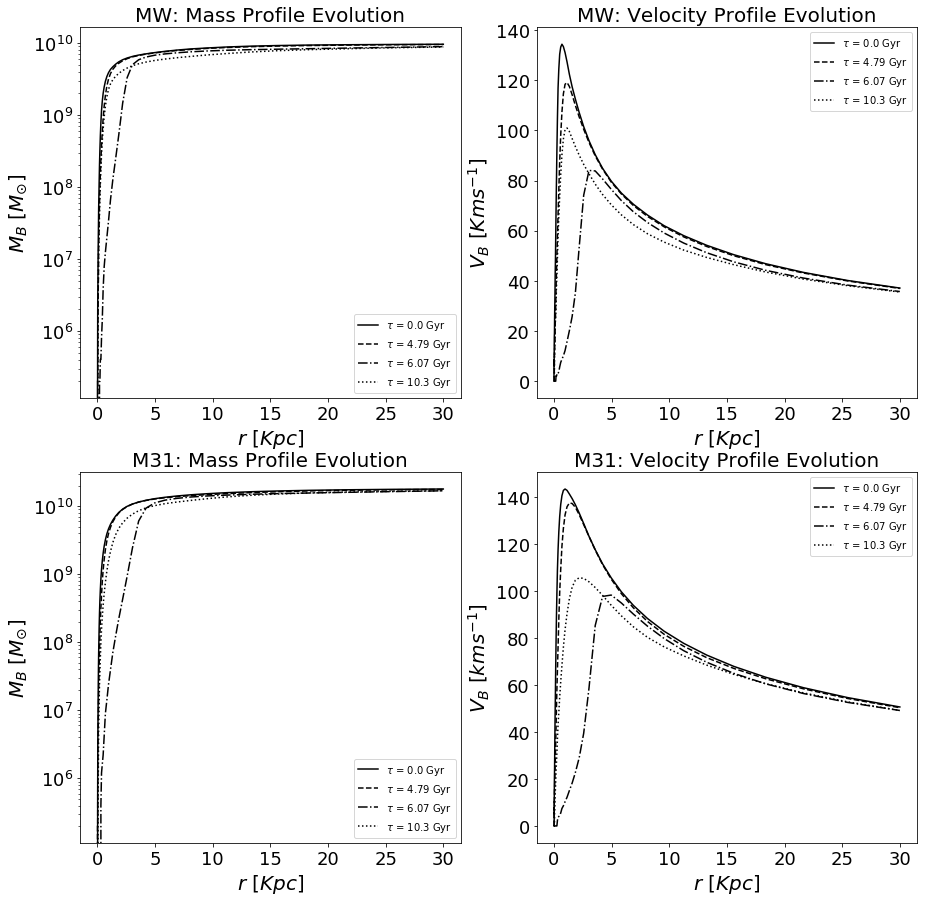

In [252]:
# Makes Plots
plt.figure(figsize=(15,15))

plt.subplots_adjust(hspace = 0.2)



plt.subplot(2,2,1)
#plt.axis([-1, 30, 1e9, 1.1e10])
plt.title("MW: Mass Profile Evolution", fontsize = 20)
plt.xlabel("$r$ $[Kpc]$", fontsize = 20)
plt.ylabel("$M_{B}$ $[M_{\odot}]$", fontsize = 20)
for file in range(len(Data_files_Mass_MW)):
    # Load Data_file in 
    Data = np.genfromtxt(Data_files_Mass_MW[file], comments="#")
    
    #Plot data
    plt.semilogy(Data[:,0], Data[:,1], color = 'black', ls = ls[file], \
                label = "$\\tau$ = " + str(Times[file])+" Gyr")

plt.legend()    

###########################################################################################
plt.subplot(2,2,2)
plt.title("MW: Velocity Profile Evolution", fontsize = 20)
plt.xlabel("$r$ $[Kpc]$", fontsize = 20)
plt.ylabel("$V_{B}$ $[Kms^{-1}]$", fontsize = 20)
#plt.axis([-1,30,40,140])
for file in range(len(Data_files_Velocity_MW)):
    # Load Data_file in 
    Data = np.genfromtxt(Data_files_Velocity_MW[file], comments="#")
    plt.plot(Data[:,0], Data[:,1], color = 'black', ls = ls[file], \
                label = "$\\tau$ = " + str(Times[file])+" Gyr")
plt.legend()



############################################################################################
plt.subplot(2,2,3)
plt.title("M31: Mass Profile Evolution", fontsize = 20)
plt.xlabel("$r$ $[Kpc]$", fontsize = 20)
plt.ylabel("$M_{B}$ $[M_{\odot}]$", fontsize = 20)
#plt.axis([-1, 30, 1e9, 2e10])
for file in range(len(Data_files_Mass_M31)):
    # Load Data_file in 
    Data = np.genfromtxt(Data_files_Mass_M31[file], comments="#")

    
    #Plot data
    plt.semilogy(Data[:,0], Data[:,1], color = 'black', ls = ls[file], \
                label = "$\\tau$ = " + str(Times[file])+" Gyr")
plt.legend()    


##########################################################################################
plt.subplot(2,2,4)
plt.title("M31: Velocity Profile Evolution", fontsize = 20)
plt.xlabel("$r$ $[Kpc]$", fontsize = 20)
plt.ylabel("$V_{B}$ $[kms^{-1}$]", fontsize = 20)
#plt.axis([-1,30,40,145])
for file in range(len(Data_files_Velocity_M31)):
    # Load Data_file in 
    Data = np.genfromtxt(Data_files_Velocity_M31[file], comments="#")

    
    #Plot data
    plt.plot(Data[:,0], Data[:,1], color = 'black', ls = ls[file], \
                label = "$\\tau$ = " + str(Times[file])+" Gyr")
plt.legend()

label_size = 18
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size

plt.savefig("MassVelProfile.png")

# Make Merger Files of both MW and M31
##### Files will contain all x, y, z, vx, vy, vz at specific snap, so Time values is for both, same snapshot

In [ ]:
# Make merger file
path_MW = "C:\\Users\Tyler\Documents\ASTR 400B\ASTR400B_Baines\Data\MW_HighRes\MW_721.txt"
path_M31 = "C:\\Users\Tyler\Documents\ASTR 400B\ASTR400B_Baines\Data\M31_HighRes\M31_721.txt"
MW_merger = np.genfromtxt(path_MW, skip_header = 3, comments = "#")
M31_merger = np.genfromtxt(path_M31, skip_header = 3, comments="#")
Remnant = np.concatenate((MW_merger[:,1], M31_merger[:,1]), axis = 0)
#print (Velocity_Merger.shape)

#plt.hist#(Velocity_Merger, bins = 20)

#Remnant = np.concatenate((MW_merger, M31_merger), axis = 0)
#np.savetxt("MW_M31_Remnant_721.dat", Remnant)


# Velocity Dispersion Computation Test

In [10]:
#Load Galaxy with snap
MW_COM = CenterOfMass("MW_721",3)


In [11]:
# Coordinate Change to reflect center of mass

MW_COMP = MW_COM.COM_P(0.1, 4.0)
MW_COMV = MW_COM.COM_V(MW_COMP[0],MW_COMP[1],MW_COMP[2])

xMW = MW_COM.x - float(MW_COMP[0])
yMW = MW_COM.y - float(MW_COMP[1])
zMW = MW_COM.z - float(MW_COMP[2])

vxMW = MW_COM.vx - float(MW_COMV[0])
vyMW = MW_COM.vy - float(MW_COMV[1])
vzMW = MW_COM.vz - float(MW_COMV[2])

MW_v_mag = np.sqrt(vxMW**2+vzMW**2+vzMW**2)
print (np.std(MW_v_mag))

130.53683158058533


MW TVelocity dispersion values at different snaps
000 107.09
335 101.86
721 130.854


# Remnant Analysis

In [19]:
MW_M31_REMNANT_COM = CenterOfMass("MW_M31_Remnant_721",3)
    

In [20]:
# Compute Total Mass
Remnant_Total = MW_M31_REMNANT_COM.total_mass()

print(Remnant_Total)

29054969999.999992 solMass


In [21]:
Remnant_COMP = MW_M31_REMNANT_COM.COM_P(0.1, 4.0)
Remnant_COMV = MW_M31_REMNANT_COM.COM_V(Remnant_COMP[0],Remnant_COMP[1],Remnant_COMP[2])


In [22]:
xR = MW_M31_REMNANT_COM.x - float(Remnant_COMP[0])
yR = MW_M31_REMNANT_COM.y - float(Remnant_COMP[1])
zR = MW_M31_REMNANT_COM.z - float(Remnant_COMP[2])

vxR = MW_M31_REMNANT_COM.vx - float(Remnant_COMV[0])
vyR = MW_M31_REMNANT_COM.vy - float(Remnant_COMV[1])
vzR = MW_M31_REMNANT_COM.vz - float(Remnant_COMV[2])

#index = np.where(abs(vxR) <= 400)

111.71869103365923
217.79150203841323
231.04067777431501
345.17841733717074
118.89740367088835


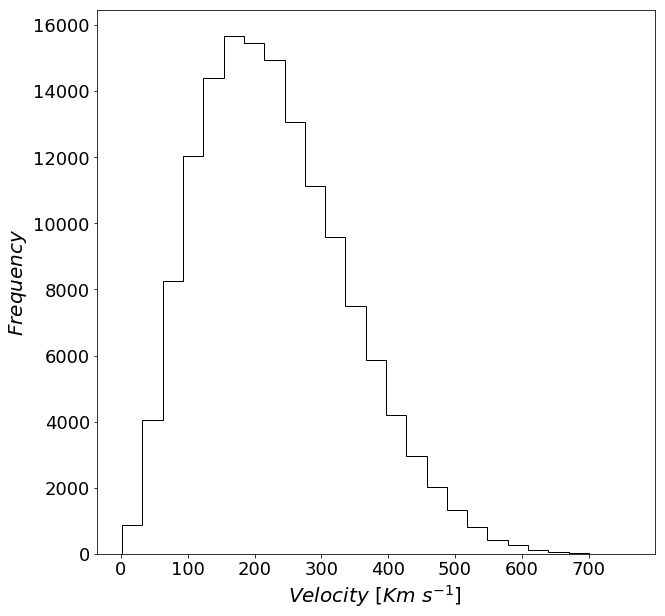

In [255]:
v_mag = np.sqrt(vxR**2 + vyR**2 + vzR**2)
uncertainty = "$"+str(np.round(np.percentile(v_mag, 50),2))+"_{"+str(np.round(np.percentile(v_mag, 16),2))+"}^{"+str(np.round(np.percentile(v_mag, 84),2))+"}$"
std = np.std(v_mag)
fig1 = plt.figure(figsize=(10,10))
#plt.title("$\sigma_{Bulge}=$"+str(np.round(std,2))+" $Km$ $s^{-1}$")
plt.xlabel("$Velocity$ [$Km$ $s^{-1}$] ", fontsize = 20)
plt.ylabel("$Frequency$", fontsize = 20)
plt.hist(v_mag, bins = 25, color = 'black', histtype="step")
#plt.axvline(np.percentile(v_mag, 16), color = 'black', ls = '--')
#plt.axvline(np.percentile(v_mag, 50), color = 'black', ls = '--')
#plt.axvline(np.percentile(v_mag, 84), color = 'black', ls = '--')
#plt.axvline(217.79, color = 'black', ls = '--')
#plt.axvline(231.04, color = 'black', ls = '--')
plt.savefig("dispersion.png")
#std = np.std(v_mag)
std = np.sqrt(np.mean(abs(v_mag - np.median(v_mag))**2))
print (std)
print (np.median(v_mag))
print (np.mean(v_mag))

print (np.percentile(v_mag, 84))
#print (np.percentile(v_mag, 50))
print (np.percentile(v_mag, 16))
       

In [85]:
#My Code
def VirialTheorem(r, v_r, Str, fudge):
    # This function takes inputs: R_grid - [radial component of dataset] [array]
    #                             V_grid - velocity as a function (r) [from dataset][array]
    #                             Str =  String to indicate dispersion or rotational
    
    
    #Store G = 4.498768e-6 without units [kpc3/M_sun/Gyr] 
    G = 4.498768e-6
    if Str == "Dispersion":
        
        # Convert from Km/s to Kpc/Gyr
        # 3.24078e-17 Kpc per Km
        # 3.16e16 seconds per Gyr
        Dispersion_sigma = v_r * 3.24078e-17 * 3.16e16 
        
        # Expression for Viral Theorem in solar masses
        Total_Mass_at_r = r * Dispersion_sigma**2 / G * fudge
        
        
    elif Str == "Rotational":
    
        Total_Mass_at_r = r * v_r**2 / G * fudge
    
    return Total_Mass_at_r

In [119]:
def JeansProfile(r,r_half,v):
    G = 4.498768e-6
    Dispersion_sigma = v*3.24078e-17*3.16e16
    Mass = 5*r_half*(Dispersion_sigma**2)*(r/r_half)**3/(G*(1+(r/r_half)**2))
    return Mass

In [50]:


Remnant_profile = MassProfile("MW_M31_Remnant", 721)


In [109]:
r_array = np.geomspace(0.001,30, endpoint= True)

In [110]:
Bulge = Remnant_profile.MassEnclosed(Bulge_index, r_array)

Rem_velocity = Remnant_profile.CircularVelocity(3,r_array)

In [59]:
Disk = Remnant_profile.MassEnclosed(2,r_array)
Halo = Remnant_profile.MassEnclosed(1,r_array)

In [63]:
Total = Bulge+Disk+Halo

In [249]:
M_virial_dis = VirialTheorem(r_array, 111.79, "Dispersion", 5)


M_jeans = JeansProfile(r_array,2.17,111.79)

In [207]:
MW_vel_component = np.genfromtxt("MW_721_Velocity_Profile.dat",comments="#")
M31_vel_component = np.genfromtxt("M31_721_Velocity_Profile.dat",comments="#")

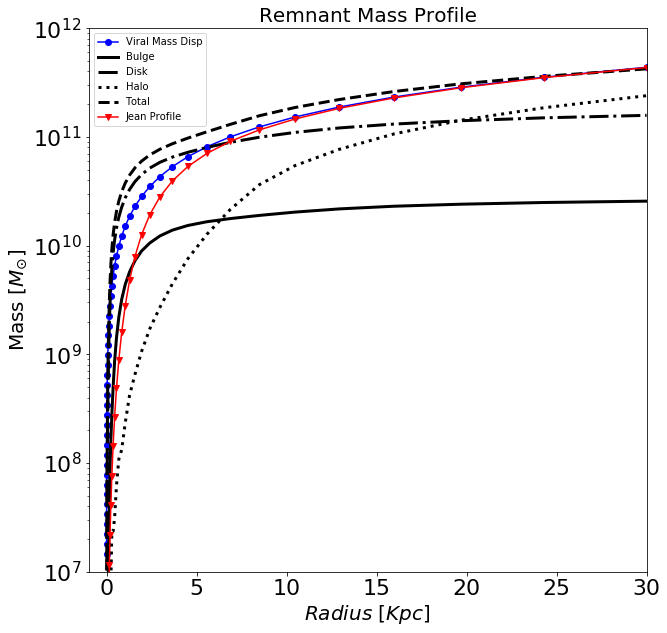

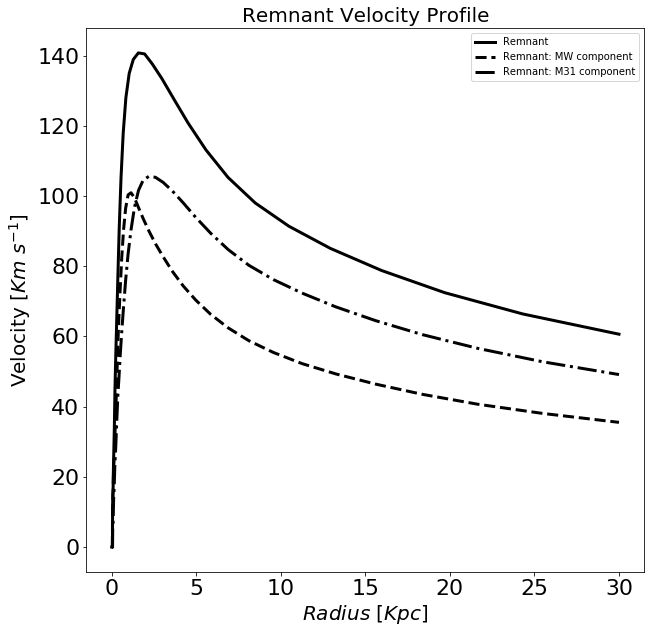

In [250]:
f = plt.figure(figsize=(10,10))
plt.title("Remnant Mass Profile", fontsize = 20)
plt.xlabel("$Radius$ $[Kpc]$",fontsize = 20)
plt.ylabel("Mass [$M_{\odot}$]", fontsize =20)
plt.axis([-1,30,1e7,1e12])

plt.semilogy(r_array, M_virial_dis, "bo-", label = "Viral Mass Disp")

plt.semilogy(r_array, Bulge, "k-", lw = 3, label = "Bulge")
plt.semilogy(r_array, Disk, "k-.", lw = 3, label = "Disk")
plt.semilogy(r_array, Halo, "k:", lw = 3,label = "Halo")
plt.semilogy(r_array, Total, "k--", lw = 3, label = "Total")
plt.semilogy(r_array, M_jeans, "rv-", label="Jean Profile")
plt.legend()

plt.savefig("RemnantVirial.png")

g = plt.figure(figsize=(10,10))
plt.title("Remnant Velocity Profile", fontsize = 20)

plt.xlabel("$Radius$ $[Kpc]$",fontsize = 20)
plt.ylabel("Velocity [$Km$ $s^{-1}$]", fontsize =20)

plt.plot(r_array, Rem_velocity, "k-", lw = 3, label = "Remnant")
plt.plot(MW_vel_component[:,0], MW_vel_component[:,1], "k--", lw = 3, label = "Remnant: MW component")
plt.plot(M31_vel_component[:,0], M31_vel_component[:,1], "k-.", lw = 3, label = "Remnant: M31 component")

plt.legend()
plt.savefig("RemnantVelProvfile.png")


# Notes
1. Virial Stability looks weird,
2. Need to do Sersic Profile on remnant and fit
3. Start filling in sections
4. Start saving plots after consulting with Prof. or TA
5. 

In [233]:
# Total Bulge Remnant Mass
Remnant_Bulge_Total = 2.905e10

# Mass to light ration
ML_ratio = 2.2

# Determine Re: The Half Mass Radius
def HalfMassRadius(Bmass,R,tot):
    # input, Bulge mass profile, Radius, Total Mass of Bulge
    # returns: Radius where mass is half the total mass 
  
    # half the total mass in units of 1e10
    HalfMass= tot/2.0/1e10
    
    # find where mass profile yields half the total mass 
    # note the use of "np.logical_and"   
    index = np.where( np.logical_and(Bmass/1e10 < (HalfMass+0.1), Bmass/1e10 > (HalfMass-0.1)))
 
    return np.mean(R[index])

def Sersic_Model(Re,r,n,ML,Mtot,A,C):
    
    
    # luminosity
    L = Mtot/ML
    # Ie = L/7.2/pi/Re**2
    Ie = L/7.2/np.pi/Re**2
    
        
    #return Ie*np.exp(-7.67*A*(((r/Re)**(1.0/n))-C))
    return Ie*np.exp(-A*(((r/Re)**(1.0/n))-C))


Re = HalfMassRadius(Rem_enclosed,r_array, Remnant_Bulge_Total)
print (Re)

2.174687922492146


In [241]:
L = Remnant_Bulge_Total/ML_ratio
Ie1 = L/7.2/np.pi/Re**2
print (np.round(Ie1,3)/1e8)

1.2343752398199999


In [231]:
r_array

array([1.00000000e-03, 1.23415533e-03, 1.52313937e-03, 1.87979056e-03,
       2.31995353e-03, 2.86318301e-03, 3.53361255e-03, 4.36102675e-03,
       5.38218439e-03, 6.64245153e-03, 8.19781692e-03, 1.01173794e-02,
       1.24864177e-02, 1.54101789e-02, 1.90185543e-02, 2.34718501e-02,
       2.89679088e-02, 3.57508989e-02, 4.41221623e-02, 5.44536015e-02,
       6.72042023e-02, 8.29404242e-02, 1.02361366e-01, 1.26329825e-01,
       1.55910626e-01, 1.92417930e-01, 2.37473613e-01, 2.93079324e-01,
       3.61705408e-01, 4.46400656e-01, 5.50927747e-01, 6.79930413e-01,
       8.39139740e-01, 1.03562878e+00, 1.27812677e+00, 1.57740696e+00,
       1.94676520e+00, 2.40261064e+00, 2.96519472e+00, 3.65951085e+00,
       4.51640481e+00, 5.57394504e+00, 6.87911396e+00, 8.48989513e+00,
       1.04778493e+01, 1.29312935e+01, 1.59592247e+01, 1.96961622e+01,
       2.43081234e+01, 3.00000000e+01])

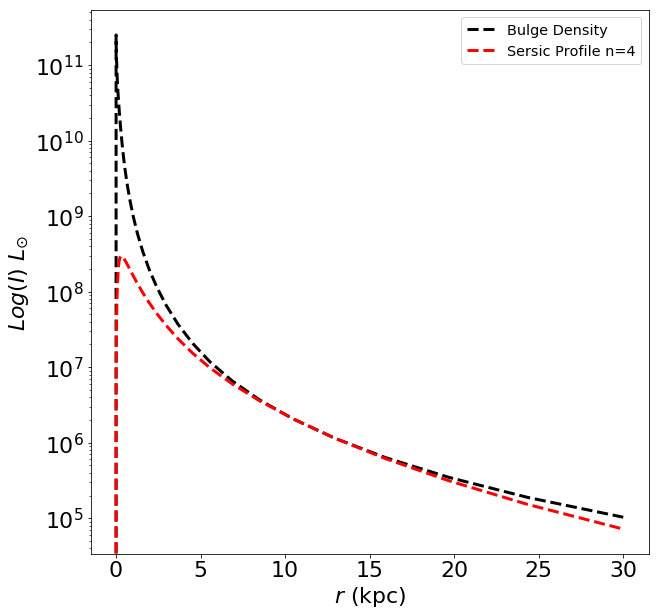

In [248]:
fig = plt.figure(figsize=(10,10))
ax = plt.subplot(111)


# bulge luminositiy density :   bulge mass profile/ Volume  
BulgeI = Rem_enclosed/4.0*3.0/r_array**3/np.pi/ML_ratio



# plot the bulge luminosity density as a proxy for surface brighntess
plt.semilogy(r_array,BulgeI, color='Black', linestyle="--",linewidth=3, label='Bulge Density')


# YOU ADD HERE: Sersic fit to the surface brightness Sersic fit
# Sersic 
#plt.semilogy(r_array,Sersic_Model(Re,r_array,7,1.5,Rem_enclosed,7,0.0), color='red', linestyle="--",linewidth=3, label='Sersic n=4')
#plt.semilogy(r_array,Sersic_Model(Re,r_array,4,ML_ratio,Rem_enclosed,8.0,1.0), color='blue', linestyle="--",linewidth=3, label='Sersic n=4 w/'+str(ML_ratio))
plt.semilogy(r_array,Sersic_Model(Re,r_array,4,2.2,Rem_enclosed,7.9,1.0), color='red', linestyle="--",linewidth=3, label='Sersic Profile n=4')
#plt.semilogy(r_array,Sersic_Model(Re,r_array,4,1.84,Rem_enclosed,10.014,1.0), color='magenta', linestyle="--",linewidth=3, label='Sersic n=4')
#plt.semilogy(r_array,Sersic_Model(Re,r_array,5,1.5,Rem_enclosed,13.7,1.0), color='purple', linestyle="--",linewidth=3, label='Sersic n=5')
#plt.semilogy(r_array,Sersic_Model(Re,r_array,3,2.1,Rem_enclosed,6.7,1.0), color='gold', linestyle="--",linewidth=3, label='Sersic n=3')
#plt.semilogy(r_array,Sersic_Model(Re,r_array,4,1.7,Rem_enclosed,11,1.0), color='cyan', linestyle="--",linewidth=3, label='Sersic n=4')
#plt.semilogy(r_array,Sersic_Model(Re,r_array,2,1.7,Rem_enclosed,5,1.0), color='grey', linestyle="--",linewidth=3, label='Sersic n=4')
#plt.semilogy(r_array,Sersic_Model(Re,r_array,4,1.5,Rem_enclosed,9.5,1.0), color='grey', linestyle="--",linewidth=3, label='Sersic n=4')



# Add axis labels
plt.xlabel('$r$ (kpc)', fontsize=22)
plt.ylabel('$Log(I)$ $L_{\odot}$', fontsize=22)

legend = ax.legend(loc='upper right',fontsize='x-large')

#adjust tick label font size
label_size = 22
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size

plt.savefig("sersic.png")
# add a legend with some customizations.